# The need for smarter factorization
At this point, the most expensive operations involve factorization.

![Timing](../images/2015-11-02-timing-analysis-new-secular.svg)

* The kernel rotation should be handled with LU.
* The Eigendecomposition should be replaced by an efficient SVD.

## Obtaining test matrices
To compare various factorization methods, I will generate some temporal instanton analysis QCQP matrices.

In [ ]:

lufact()

In [1]:
?spdiagm

search: 

```
spdiagm(B, d[, m, n])
```

Construct a sparse diagonal matrix. `B` is a tuple of vectors containing the diagonals and `d` is a tuple containing the positions of the diagonals. In the case the input contains only one diagonal, `B` can be a vector (instead of a tuple) and `d` can be the diagonal position (instead of a tuple), defaulting to 0 (diagonal). Optionally, `m` and `n` specify the size of the resulting sparse matrix.


spdiagm



In [ ]:
spdiagm()

## No more Eig?
Upon studying the structure of the rotated constraint matrix, I believe the Eigendecomposition is unnecessary. I modified my code to eschew the eig. Let's see if I get the same numerical results:

In [1]:
include("../src/TemporalInstanton.jl")
using TemporalInstanton,MatpowerCases

# compile everything with this run:
inputData = load_rts96_data(return_as_type=true);
# Thermal model parameters:
inputData.Tamb = 35. # C
inputData.T0 = 60. #46. # initial line steady-state temp

inputData.time_values = 0:30:300 # five minutes in 30-sec steps
inputData.int_length = 300. # seconds = 5 min
Gp,Dp,Rp = inputData.G0,inputData.D0,inputData.R0
inputData.G0 = [0.7*Gp;0.7*Gp;0.7*Gp;0.7*Gp;0.7*Gp;0.7*Gp]
inputData.D0 = [0.9*Dp;0.9*Dp;0.9*Dp;0.9*Dp;0.9*Dp;0.9*Dp]
inputData.R0 = [Rp;1.1*Rp;1.2*Rp;1.3*Rp;1.4*Rp;1.5*Rp]

@time results = solve_temporal_instanton(inputData);

n = length(inputData.k)
nr = length(inputData.Ridx)
T = convert(Int64,length(inputData.G0)/n)
outputData = process_instanton_results(results,n,nr,T,return_as_type=true);

sort(outputData.score)

  likely near /home/jkersulis/.julia/v0.4/GraphLayout/src/draw.jl:3


r=0 check: 	removing 1 lines


 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in require at ./loading.jl:243
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/jkersulis/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /home/jkersulis/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading /home/jkersulis/.julia/v0.4/GraphLayout/src/draw.jl, in expression starting on line 3
  likely near /home/jkersulis/.julia/v0.4/GraphLayout/src/draw.jl:23
  likely near /home/jkersulis/.julia/v0.4/GraphLayout/src/draw.jl:135


ISF pre-check: 	removing lines Int64[]
 11

104-element Array{Tuple{Float64,Int64},1}:
 (0.263787830020006,25)  
 (0.3273164183285288,30) 
 (1.2886107366327355,69) 
 (2.2041515936832066,89) 
 (2.322973886040895,118) 
 (2.42316154712363,64)   
 (4.67875546231252,42)   
 (4.865240811106734,102) 
 (4.899167201158152,31)  
 (5.678266048785588,80)  
 (5.938620037616521,1)   
 (6.439172990446961,100) 
 (6.4608887584718095,62) 
 ⋮                       
 (178.0855817862111,99)  
 (303.00328573243416,103)
 (370.61443512027347,66) 
 (370.61443512027347,67) 
 (391.3070873721824,33)  
 (428.94449223314234,40) 
 (923.97998538764,72)    
 (979.1988880469704,117) 
 (1319.8524187115077,79) 
 (1390.0270570261027,110)
 (1967.2698882361206,73) 
 (1967.2698882361206,74) 

.471698 seconds (9.28 M allocations: 1.223 GB, 1.74% gc time)


In [2]:
using JLD
Qconstr = load("Qconstr.jld")["Qconstr"][1]
Qeig = load("Qeig.jld")
D,U,Qc,N,A,Qconstr = (Qeig["D"],Qeig["U"],Qeig["Qc"],
                    Qeig["N"],Qeig["A"],Qeig["Qconstr"])
m,n = size(A)
T = 6

([-1.6263e-19,-1.0842e-19,-8.84871e-20,-5.42101e-20,-5.11556e-20,-4.39434e-20,-2.03288e-20,-1.35525e-20,-1.35525e-20,-1.25872e-20  …  1.89735e-19,4.95953e-19,5.42101e-19,1.30104e-18,2.87982e-5,7.68095e-5,0.000204847,0.000546198,0.00145554,0.00387294],
108x108 Array{Float64,2}:
 0.0  0.0  -0.0655642   0.0  -0.250625    …  0.0  0.0  0.0  0.0   0.06375   
 0.0  0.0   0.00899026  0.0  -0.172969       0.0  0.0  0.0  0.0   0.135029  
 0.0  0.0  -0.013932    0.0  -0.0264157      0.0  0.0  0.0  0.0   0.00983275
 0.0  0.0  -0.0648723   0.0   0.172969       0.0  0.0  0.0  0.0   0.0690593 
 0.0  0.0   0.00469648  0.0   0.00552324     0.0  0.0  0.0  0.0   0.00373929
 0.0  0.0  -0.0627797   0.0   0.0195721   …  0.0  0.0  0.0  0.0   0.0721536 
 0.0  0.0   0.122873    0.0   0.254696       0.0  0.0  0.0  0.0  -0.184615  
 0.0  0.0  -0.0115918   0.0  -0.476801       0.0  0.0  0.0  0.0   0.185205  
 0.0  0.0   0.149278    0.0  -0.386489       0.0  0.0  0.0  0.0   0.369547  
 0.0  0.0   0.349904    0.0  

In [83]:
N12 = full(N[1:end-T,:])
N3 = full(N[end-T+1:end,:])

6x108 Array{Float64,2}:
  0.0          0.0          0.0          …  0.00218153  0.000768656
  0.0          0.0          0.0             0.0         0.0        
  0.0          0.0          0.0             0.0         0.0        
  0.0          0.0          0.0             0.0         0.0        
  0.0          0.0          0.0             0.0         0.0        
 -0.00396735  -0.00840325  -0.000611921  …  0.0         0.0        

In [75]:
rank(full(N12))

108

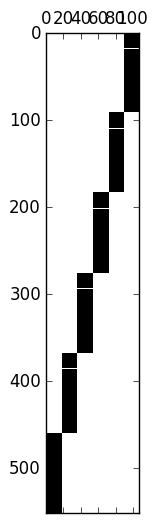

PyObject <matplotlib.image.AxesImage object at 0x7ff13ab9bbe0>

In [86]:
using PyPlot
spy(N12)

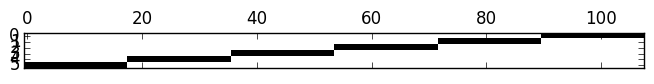

PyObject <matplotlib.image.AxesImage object at 0x7ff13a3a3320>

In [87]:
spy(N3)

In [136]:
tqr = (@timed qrfact(A'))[2]
tlu = (@timed lufact(A'))[2]

100*(tqr - tlu)/tqr

61.849760215491386

In [100]:
?@timed

```
@timed
```

A macro to execute an expression, and return the value of the expression, elapsed time, total bytes allocated, garbage collection time, and an object with various memory allocation counters.


In [141]:
?tlu

search: 

No documentation found.

`tlu` is of type `Float64`:

**Summary:**

```julia
immutable Float64 <: AbstractFloat
```


tlu PartialQuickSort tight_layout task_local_storage



In [144]:
maxabs(A*N)

6.775049271601219e-14

In [145]:
N

558x108 sparse matrix with 9936 Float64 entries:
	[461,   1]  =  -0.0943326
	[462,   1]  =  -0.176547
	[463,   1]  =  -0.0894147
	[464,   1]  =  -0.049601
	[465,   1]  =  0.9487
	[466,   1]  =  0.0635552
	[467,   1]  =  -0.040272
	[468,   1]  =  -0.0518462
	[469,   1]  =  -0.12544
	[470,   1]  =  -0.0351867
	⋮
	[83 , 108]  =  0.0214753
	[84 , 108]  =  0.0208556
	[85 , 108]  =  0.0215929
	[86 , 108]  =  0.0207697
	[87 , 108]  =  0.0216073
	[88 , 108]  =  0.021825
	[89 , 108]  =  0.0203169
	[90 , 108]  =  0.0256986
	[91 , 108]  =  0.0184772
	[92 , 108]  =  -0.215526
	[553, 108]  =  0.000768656

In [137]:
?lufact

search: 

```rst
..  lufact(A [,pivot=Val{true}]) -> F

Compute the LU factorization of ``A``. The return type of ``F`` depends on the type of ``A``. In most cases, if ``A`` is a subtype ``S`` of AbstractMatrix with an element type ``T`` supporting ``+``, ``-``, ``*`` and ``/`` the return type is ``LU{T,S{T}}``. If pivoting is chosen (default) the element type should also support ``abs`` and ``<``. When ``A`` is sparse and have element of type ``Float32``, ``Float64``, ``Complex{Float32}``, or ``Complex{Float64}`` the return type is ``UmfpackLU``. Some examples are shown in the table below.

======================= ========================= ========================================
Type of input ``A``     Type of output ``F``      Relationship between ``F`` and ``A``
======================= ========================= ========================================
:func:`Matrix`           ``LU``                   ``F[:L]*F[:U] == A[F[:p], :]``
:func:`Tridiagonal`      ``LU{T,Tridiagonal{T}}`` ``F[:L]*F[:U] == A[F[:p], :]``
:func:`SparseMatrixCSC`  ``UmfpackLU``            ``F[:L]*F[:U] == (F[:Rs] .* A)[F[:p], F[:q]]``
======================= ========================= ========================================

The individual components of the factorization ``F`` can be accessed by indexing:

=========== ======================================= ====== ======================== =============
Component   Description                             ``LU`` ``LU{T,Tridiagonal{T}}`` ``UmfpackLU``
=========== ======================================= ====== ======================== =============
``F[:L]``   ``L`` (lower triangular) part of ``LU``    ✓            ✓                        ✓
``F[:U]``   ``U`` (upper triangular) part of ``LU``    ✓            ✓                        ✓
``F[:p]``   (right) permutation ``Vector``             ✓            ✓                        ✓
``F[:P]``   (right) permutation ``Matrix``             ✓            ✓
``F[:q]``   left permutation ``Vector``                                                      ✓
``F[:Rs]``  ``Vector`` of scaling factors                                                    ✓
``F[:(:)]`` ``(L,U,p,q,Rs)`` components                                                      ✓
=========== ======================================= ====== ======================== =============

================== ====== ======================== =============
Supported function ``LU`` ``LU{T,Tridiagonal{T}}`` ``UmfpackLU``
================== ====== ======================== =============
     ``/``            ✓
     ``\``            ✓                       ✓             ✓
     ``cond``         ✓                                     ✓
     ``det``          ✓                       ✓             ✓
     ``logdet``       ✓                       ✓
     ``logabsdet``    ✓                       ✓
     ``size``         ✓                       ✓
================== ====== ======================== =============
```


lufact lufact! plot_surface



In [93]:
t

(Base.SparseMatrix.SPQR.Factorization{Float64}(558,450,Ptr{Base.SparseMatrix.SPQR.C_Factorization{Float64}} @0x0000000008c725c0),0.009476554,562564,0.0,Base.GC_Diff(562564,77,3,9,2,34,0,0,0))

In [ ]:
spq

In [76]:
rank(full(N3))

6

In [80]:
U

108x108 Array{Float64,2}:
 0.0  0.0  -0.0655642   0.0  -0.250625    …  0.0  0.0  0.0  0.0   0.06375   
 0.0  0.0   0.00899026  0.0  -0.172969       0.0  0.0  0.0  0.0   0.135029  
 0.0  0.0  -0.013932    0.0  -0.0264157      0.0  0.0  0.0  0.0   0.00983275
 0.0  0.0  -0.0648723   0.0   0.172969       0.0  0.0  0.0  0.0   0.0690593 
 0.0  0.0   0.00469648  0.0   0.00552324     0.0  0.0  0.0  0.0   0.00373929
 0.0  0.0  -0.0627797   0.0   0.0195721   …  0.0  0.0  0.0  0.0   0.0721536 
 0.0  0.0   0.122873    0.0   0.254696       0.0  0.0  0.0  0.0  -0.184615  
 0.0  0.0  -0.0115918   0.0  -0.476801       0.0  0.0  0.0  0.0   0.185205  
 0.0  0.0   0.149278    0.0  -0.386489       0.0  0.0  0.0  0.0   0.369547  
 0.0  0.0   0.349904    0.0  -0.0908756      0.0  0.0  0.0  0.0  -0.108246  
 0.0  0.0   0.51235     0.0  -0.424615    …  0.0  0.0  0.0  0.0  -0.378968  
 0.0  0.0  -0.392403    0.0  -0.147438       0.0  0.0  0.0  0.0   0.240085  
 0.0  0.0  -0.610923    0.0  -0.271019       0.0  

In [47]:
svds(N3,nsv=6)[3]

108x6 Array{Float64,2}:
  0.06375       9.81308e-18   3.92523e-17  …  -1.96262e-17   0.0        
  0.135029     -1.96262e-17  -3.92523e-17     -9.81308e-18   0.0        
  0.00983275    1.96262e-17   0.0             -1.22663e-18  -1.96262e-17
  0.0690593    -9.81308e-18   3.92523e-17     -4.41589e-17   9.81308e-18
  0.00373929    9.81308e-18   0.0              3.06659e-18   9.81308e-18
  0.0721536     0.0          -2.94392e-17  …   0.0           0.0        
 -0.184615      0.0           1.59463e-17      1.96262e-17   1.96262e-17
  0.185205      0.0          -5.39719e-17      1.96262e-17   3.92523e-17
  0.369547      3.92523e-17  -1.07944e-16      1.96262e-17   3.92523e-17
 -0.108246     -3.92523e-17   1.96262e-17      9.81308e-18   1.96262e-17
 -0.378968      3.92523e-17   7.85046e-17  …  -1.96262e-17   0.0        
  0.240085      1.96262e-17  -3.92523e-17     -3.92523e-17   9.81308e-18
 -0.600201     -7.85046e-17   7.85046e-17      1.57009e-16   0.0        
  ⋮                        

In [60]:
N'[:,1:n-m-T]

108x102 sparse matrix with 1818 Float64 entries:
	[91 ,   1]  =  -0.095228
	[92 ,   1]  =  0.71984
	[93 ,   1]  =  0.00585387
	[94 ,   1]  =  -0.0206859
	[95 ,   1]  =  -0.181859
	[96 ,   1]  =  -0.0945811
	[97 ,   1]  =  0.104249
	[98 ,   1]  =  0.00108345
	[99 ,   1]  =  -0.0550489
	[100,   1]  =  -0.0414709
	⋮
	[80 , 102]  =  0.178465
	[81 , 102]  =  -0.00787904
	[82 , 102]  =  0.266282
	[83 , 102]  =  0.259965
	[84 , 102]  =  -0.127572
	[85 , 102]  =  0.422756
	[86 , 102]  =  -0.0509411
	[87 , 102]  =  -0.119842
	[88 , 102]  =  0.559947
	[89 , 102]  =  0.284754
	[90 , 102]  =  -0.0984224

In [67]:
Us,Ss,Vs = svds(N3,nsv=6)
Ss = Ss.^2
Ncomplete = N'[:,1:n-m-T]

span = [Ncomplete Vs]

108x108 Array{Float64,2}:
  0.0          0.0         0.0        …   9.81308e-18   0.0        
  0.0          0.0         0.0            7.85046e-17  -3.92523e-17
  0.0          0.0         0.0           -4.90654e-17   9.81308e-18
  0.0          0.0         0.0            3.92523e-17   1.96262e-17
  0.0          0.0         0.0            0.0          -1.22663e-18
  0.0          0.0         0.0        …   2.94392e-17   0.0        
  0.0          0.0         0.0           -5.88785e-17   1.96262e-17
  0.0          0.0         0.0           -1.96262e-17   0.0        
  0.0          0.0         0.0            1.17757e-16   3.92523e-17
  0.0          0.0         0.0            0.0           0.0        
  0.0          0.0         0.0        …  -3.92523e-17  -7.85046e-17
  0.0          0.0         0.0            1.96262e-17   3.92523e-17
  0.0          0.0         0.0           -1.57009e-16   7.85046e-17
  ⋮                                   ⋱                            
  0.104249     0.26333

In [68]:
rank(span)

33

In [70]:
rank(full(N))

108

In [6]:
Ds,Us = eigs(Qconstr,nev=6)

([0.0038729412011626594,0.0014555396811092292,0.0005461976717325809,0.00020484653587438627,7.680946048583108e-5,2.8798246425662575e-5],
108x6 Array{Float64,2}:
  0.06375       1.04083e-17   1.17094e-17  …  -6.93889e-18  -2.77556e-17
  0.135029     -2.01662e-17   1.56125e-17      0.0          -1.38778e-17
  0.00983275   -1.12757e-17   3.46945e-18      1.38778e-17   2.77556e-17
  0.0690593    -5.20417e-18   1.73472e-17      1.38778e-17   1.38778e-17
  0.00373929    8.67362e-19  -2.60209e-18     -1.56125e-17  -2.77556e-17
  0.0721536    -2.1684e-17    2.60209e-18  …   0.0           1.6263e-18 
 -0.184615      5.20417e-17   3.46945e-18      0.0          -2.77556e-17
  0.185205     -7.28584e-17  -1.73472e-17      0.0          -2.77556e-17
  0.369547     -9.36751e-17   6.59195e-17      0.0           1.38778e-17
 -0.108246      6.50521e-17   1.73472e-17      0.0          -6.93889e-18
 -0.378968      2.94903e-17  -6.93889e-18  …   5.55112e-17   9.54098e-18
  0.240085     -1.2837e-16   -2.08167

In [10]:
rank(U)

108

In [21]:
rank([Us [eye(102);zeros(6,102)] ])

103

In [17]:
Us

108x6 Array{Float64,2}:
  0.06375       1.04083e-17   1.17094e-17  …  -6.93889e-18  -2.77556e-17
  0.135029     -2.01662e-17   1.56125e-17      0.0          -1.38778e-17
  0.00983275   -1.12757e-17   3.46945e-18      1.38778e-17   2.77556e-17
  0.0690593    -5.20417e-18   1.73472e-17      1.38778e-17   1.38778e-17
  0.00373929    8.67362e-19  -2.60209e-18     -1.56125e-17  -2.77556e-17
  0.0721536    -2.1684e-17    2.60209e-18  …   0.0           1.6263e-18 
 -0.184615      5.20417e-17   3.46945e-18      0.0          -2.77556e-17
  0.185205     -7.28584e-17  -1.73472e-17      0.0          -2.77556e-17
  0.369547     -9.36751e-17   6.59195e-17      0.0           1.38778e-17
 -0.108246      6.50521e-17   1.73472e-17      0.0          -6.93889e-18
 -0.378968      2.94903e-17  -6.93889e-18  …   5.55112e-17   9.54098e-18
  0.240085     -1.2837e-16   -2.08167e-17      5.55112e-17   2.77556e-17
 -0.600201      2.67147e-16   6.93889e-17      5.55112e-17   1.04083e-17
  ⋮                        

In [18]:
[eye(102);zeros(6,102)]

108x102 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

In [12]:
108-6

102

In [8]:
Us

108x6 Array{Float64,2}:
  0.06375       1.04083e-17   1.17094e-17  …  -6.93889e-18  -2.77556e-17
  0.135029     -2.01662e-17   1.56125e-17      0.0          -1.38778e-17
  0.00983275   -1.12757e-17   3.46945e-18      1.38778e-17   2.77556e-17
  0.0690593    -5.20417e-18   1.73472e-17      1.38778e-17   1.38778e-17
  0.00373929    8.67362e-19  -2.60209e-18     -1.56125e-17  -2.77556e-17
  0.0721536    -2.1684e-17    2.60209e-18  …   0.0           1.6263e-18 
 -0.184615      5.20417e-17   3.46945e-18      0.0          -2.77556e-17
  0.185205     -7.28584e-17  -1.73472e-17      0.0          -2.77556e-17
  0.369547     -9.36751e-17   6.59195e-17      0.0           1.38778e-17
 -0.108246      6.50521e-17   1.73472e-17      0.0          -6.93889e-18
 -0.378968      2.94903e-17  -6.93889e-18  …   5.55112e-17   9.54098e-18
  0.240085     -1.2837e-16   -2.08167e-17      5.55112e-17   2.77556e-17
 -0.600201      2.67147e-16   6.93889e-17      5.55112e-17   1.04083e-17
  ⋮                        

In [79]:
round(D,10)

108-element Array{Float64,1}:
 -0.0        
 -0.0        
 -0.0        
 -0.0        
 -0.0        
 -0.0        
 -0.0        
 -0.0        
 -0.0        
 -0.0        
 -0.0        
 -0.0        
 -0.0        
  ⋮          
  0.0        
  0.0        
  0.0        
  0.0        
  0.0        
  0.0        
  2.87982e-5 
  7.68095e-5 
  0.000204846
  0.000546198
  0.00145554 
  0.00387294 

In [43]:
Q,R = qr(full(A)')
P = Q'
# P = N'

450x558 Array{Float64,2}:
  0.0           0.0           0.0          …  0.0           0.0     
  0.0389488     0.0           0.0             0.0           0.0     
  0.00908268   -3.21027e-17   0.0             0.0           0.0     
  0.0221437    -6.46185e-17   2.91286e-17     0.0           0.0     
  0.0387909     2.60258e-17  -6.96516e-18     0.0           0.0     
  0.00868475   -2.61922e-17   3.84469e-18  …  0.0           0.0     
 -2.33342e-7    4.76162e-22   1.57988e-22     0.0           0.0     
 -0.0190059     8.08736e-18  -2.00658e-17     0.0           0.0     
  0.0252781    -7.71641e-17   8.87173e-17     0.0           0.0     
  0.0478962     5.12225e-17   2.24238e-17     0.0           0.0     
  0.0298048     2.08087e-17   6.56153e-17  …  0.0           0.0     
  0.0444463     3.20551e-17   1.05745e-16     0.0           0.0     
  0.0352834     3.8967e-17    1.15922e-16     0.0           0.0     
  ⋮                                        ⋱                        
 -1.9707

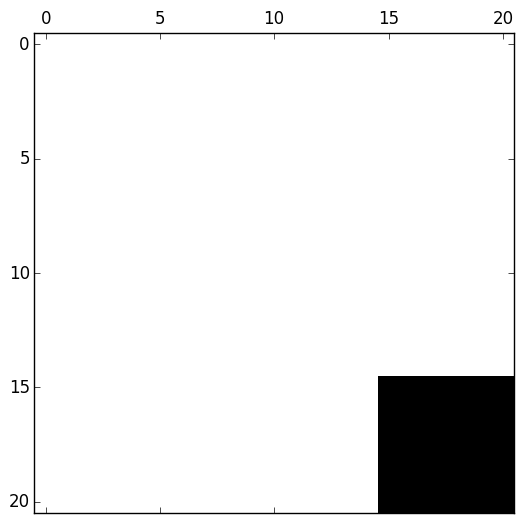

PyObject <matplotlib.image.AxesImage object at 0x7f2bd11a9b38>

In [45]:
using PyPlot
PyPlot.svg(true)
spy((P*Qc*(P'))[430:end,430:end])

In [61]:
Qtest = P*Qc*(P')
# Qtest = full(N'*Qc*N)
eig(Qtest)[1]
Qtest

450x450 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …   0.0           0.0        
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0           0.0        
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0           0.0        
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0           0.0        
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0           0.0        
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …   0.0           0.0        
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0           0.0        
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0           0.0        
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0           0.0        
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0           0.0        
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …   0.0           0.0        
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0           0.0        
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0         

In [58]:
Q*Qc[n-m+1:end,n-m+1:end]*(Q')

558x558 Array{Float64,2}:
  7.02661e-8    1.83843e-8    6.5444e-8    …   6.81326e-17  -1.5409e-17 
  1.83843e-8    4.81006e-9    1.71227e-8       2.65966e-16  -7.43649e-17
  6.5444e-8     1.71227e-8    6.09528e-8      -2.37166e-17   5.77842e-16
  1.01795e-7    2.66335e-8    9.48091e-8       3.43774e-17   4.80136e-16
  1.19208e-7    3.11895e-8    1.11027e-7       4.07366e-16  -1.7192e-16 
  1.7816e-8     4.66137e-9    1.65934e-8   …   1.97537e-16  -8.51494e-18
 -2.3465e-8    -6.13936e-9   -2.18547e-8      -1.51952e-16  -1.94286e-16
  1.35807e-7    3.55325e-8    1.26487e-7      -1.51274e-17   1.32691e-17
 -4.62173e-8   -1.20923e-8   -4.30456e-8      -1.47333e-16   3.6294e-16 
 -2.50525e-7   -6.5547e-8    -2.33332e-7      -4.46127e-16   2.57859e-16
 -3.31438e-7   -8.67171e-8   -3.08693e-7   …   1.25361e-17   6.21622e-17
 -3.38816e-7   -8.86475e-8   -3.15565e-7       1.13975e-17  -7.41057e-16
 -3.25206e-7   -8.50865e-8   -3.02888e-7       2.14086e-17  -3.19459e-16
  ⋮                      

In [64]:
?eigs

search: 

```rst
..  eigs(A, B; nev=6, ncv=max(20,2*nev+1), which="LM", tol=0.0, maxiter=300, sigma=nothing, ritzvec=true, v0=zeros((0,))) -> (d,[v,],nconv,niter,nmult,resid)

Computes generalized eigenvalues ``d`` of ``A`` and ``B`` using Lanczos or Arnoldi iterations for
real symmetric or general nonsymmetric matrices respectively.

The following keyword arguments are supported:
 * ``nev``: Number of eigenvalues
 * ``ncv``: Number of Krylov vectors used in the computation; should satisfy ``nev+1 <= ncv <= n`` for real symmetric problems and ``nev+2 <= ncv <= n`` for other problems, where ``n`` is the size of the input matrices ``A`` and ``B``. The default is ``ncv = max(20,2*nev+1)``.

   Note that these restrictions limit the input matrix ``A`` to be of dimension at least 2.
 * ``which``: type of eigenvalues to compute. See the note below.

   ========= ======================================================================================================================
   ``which`` type of eigenvalues
   ========= ======================================================================================================================
   ``:LM``   eigenvalues of largest magnitude (default)
   ``:SM``   eigenvalues of smallest magnitude
   ``:LR``   eigenvalues of largest real part
   ``:SR``   eigenvalues of smallest real part
   ``:LI``   eigenvalues of largest imaginary part (nonsymmetric or complex ``A`` only)
   ``:SI``   eigenvalues of smallest imaginary part (nonsymmetric or complex ``A`` only)
   ``:BE``   compute half of the eigenvalues from each end of the spectrum, biased in favor of the high end. (real symmetric ``A`` only)
   ========= ======================================================================================================================

 * ``tol``: tolerance (:math:`tol \le 0.0` defaults to ``DLAMCH('EPS')``)
 * ``maxiter``: Maximum number of iterations (default = 300)
 * ``sigma``: Specifies the level shift used in inverse iteration. If ``nothing`` (default), defaults to ordinary (forward) iterations. Otherwise, find eigenvalues close to ``sigma`` using shift and invert iterations.
 * ``ritzvec``: Returns the Ritz vectors ``v`` (eigenvectors) if ``true``
 * ``v0``: starting vector from which to start the iterations

``eigs`` returns the ``nev`` requested eigenvalues in ``d``, the corresponding Ritz vectors ``v`` (only if ``ritzvec=true``), the number of converged eigenvalues ``nconv``, the number of iterations ``niter`` and the number of matrix vector multiplications ``nmult``, as well as the final residual vector ``resid``.

.. note:: The ``sigma`` and ``which`` keywords interact: the description of eigenvalues searched for by ``which`` do _not_ necessarily refer to the eigenvalue problem :math:`Av = Bv\lambda`, but rather the linear operator constructed by the specification of the iteration mode implied by ``sigma``.

   =============== ================================== ==================================
   ``sigma``       iteration mode                     ``which`` refers to the problem
   =============== ================================== ==================================
   ``nothing``     ordinary (forward)                 :math:`Av = Bv\lambda`
   real or complex inverse with level shift ``sigma`` :math:`(A - \sigma B )^{-1}B = v\nu`
   =============== ================================== ==================================
```

```rst
..  eigs(A; nev=6, ncv=max(20,2*nev+1), which="LM", tol=0.0, maxiter=300, sigma=nothing, ritzvec=true, v0=zeros((0,))) -> (d,[v,],nconv,niter,nmult,resid)

Computes eigenvalues ``d`` of ``A`` using Lanczos or Arnoldi iterations for
real symmetric or general nonsymmetric matrices respectively.

The following keyword arguments are supported:
 * ``nev``: Number of eigenvalues
 * ``ncv``: Number of Krylov vectors used in the computation; should satisfy ``nev+1 <= ncv <= n`` for real symmetric problems and ``nev+2 <= ncv <= n`` for other problems, where ``n`` is the size of the input matrix ``A``. The default is ``ncv = max(20,2*nev+1)``.

   Note that these restrictions limit the input matrix ``A`` to be of dimension at least 2.
 * ``which``: type of eigenvalues to compute. See the note below.

   ========= ======================================================================================================================
   ``which`` type of eigenvalues
   ========= ======================================================================================================================
   ``:LM``   eigenvalues of largest magnitude (default)
   ``:SM``   eigenvalues of smallest magnitude
   ``:LR``   eigenvalues of largest real part
   ``:SR``   eigenvalues of smallest real part
   ``:LI``   eigenvalues of largest imaginary part (nonsymmetric or complex ``A`` only)
   ``:SI``   eigenvalues of smallest imaginary part (nonsymmetric or complex ``A`` only)
   ``:BE``   compute half of the eigenvalues from each end of the spectrum, biased in favor of the high end. (real symmetric ``A`` only)
   ========= ======================================================================================================================

 * ``tol``: tolerance (:math:`tol \le 0.0` defaults to ``DLAMCH('EPS')``)
 * ``maxiter``: Maximum number of iterations (default = 300)
 * ``sigma``: Specifies the level shift used in inverse iteration. If ``nothing`` (default), defaults to ordinary (forward) iterations. Otherwise, find eigenvalues close to ``sigma`` using shift and invert iterations.
 * ``ritzvec``: Returns the Ritz vectors ``v`` (eigenvectors) if ``true``
 * ``v0``: starting vector from which to start the iterations

``eigs`` returns the ``nev`` requested eigenvalues in ``d``, the corresponding Ritz vectors ``v`` (only if ``ritzvec=true``), the number of converged eigenvalues ``nconv``, the number of iterations ``niter`` and the number of matrix vector multiplications ``nmult``, as well as the final residual vector ``resid``.

.. note:: The ``sigma`` and ``which`` keywords interact: the description of eigenvalues searched for by ``which`` do _not_ necessarily refer to the eigenvalues of ``A``, but rather the linear operator constructed by the specification of the iteration mode implied by ``sigma``.

   =============== ================================== ==================================
   ``sigma``       iteration mode                     ``which`` refers to eigenvalues of
   =============== ================================== ==================================
   ``nothing``     ordinary (forward)                 :math:`A`
   real or complex inverse with level shift ``sigma`` :math:`(A - \sigma I )^{-1}`
   =============== ================================== ==================================
```


eigs eigvecs eigvals eigvals! get_fignums LaTeXStrings leading_ones



In [53]:
Q

558x450 Array{Float64,2}:
 0.0  0.0389488   0.00908268    0.0221437    …   6.81822e-17   1.54389e-17
 0.0  0.0        -3.21027e-17  -6.46185e-17      2.66159e-16   7.45093e-17
 0.0  0.0         0.0           2.91286e-17     -2.37339e-17  -5.78964e-16
 0.0  0.0         0.0           0.0              3.44025e-17  -4.81069e-16
 0.0  0.0         0.0           0.0              4.07663e-16   1.72254e-16
 0.0  0.0         0.0           0.0          …   1.97681e-16   8.53147e-18
 0.0  0.0         0.0           0.0             -1.52062e-16   1.94663e-16
 0.0  0.0         0.0           0.0             -1.51384e-17  -1.32949e-17
 0.0  0.0         0.0           0.0             -1.47441e-16  -3.63645e-16
 0.0  0.0         0.0           0.0             -4.46452e-16  -2.5836e-16 
 0.0  0.0         0.0           0.0          …   1.25452e-17  -6.2283e-17 
 0.0  0.0         0.0           0.0              1.14058e-17   7.42496e-16
 0.0  0.0         0.0           0.0              2.14242e-17   3.20079e-16

In [38]:
P*Qc*(P')

450x450 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …   0.0           0.0        
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0           0.0        
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0           0.0        
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0           0.0        
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0           0.0        
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …   0.0           0.0        
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0           0.0        
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0           0.0        
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0           0.0        
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0           0.0        
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …   0.0           0.0        
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0           0.0        
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0         

In [28]:
round(N'*N)

108x108 sparse matrix with 108 Float64 entries:
	[1  ,   1]  =  1.0
	[2  ,   2]  =  1.0
	[3  ,   3]  =  1.0
	[4  ,   4]  =  1.0
	[5  ,   5]  =  1.0
	[6  ,   6]  =  1.0
	[7  ,   7]  =  1.0
	[8  ,   8]  =  1.0
	[9  ,   9]  =  1.0
	[10 ,  10]  =  1.0
	⋮
	[98 ,  98]  =  1.0
	[99 ,  99]  =  1.0
	[100, 100]  =  1.0
	[101, 101]  =  1.0
	[102, 102]  =  1.0
	[103, 103]  =  1.0
	[104, 104]  =  1.0
	[105, 105]  =  1.0
	[106, 106]  =  1.0
	[107, 107]  =  1.0
	[108, 108]  =  1.0

In [25]:
P

450x558 Array{Float64,2}:
  0.0           0.0           0.0          …  0.0           0.0     
  0.0389488     0.0           0.0             0.0           0.0     
  0.00908268   -3.21027e-17   0.0             0.0           0.0     
  0.0221437    -6.46185e-17   2.91286e-17     0.0           0.0     
  0.0387909     2.60258e-17  -6.96516e-18     0.0           0.0     
  0.00868475   -2.61922e-17   3.84469e-18  …  0.0           0.0     
 -2.33342e-7    4.76162e-22   1.57988e-22     0.0           0.0     
 -0.0190059     8.08736e-18  -2.00658e-17     0.0           0.0     
  0.0252781    -7.71641e-17   8.87173e-17     0.0           0.0     
  0.0478962     5.12225e-17   2.24238e-17     0.0           0.0     
  0.0298048     2.08087e-17   6.56153e-17  …  0.0           0.0     
  0.0444463     3.20551e-17   1.05745e-16     0.0           0.0     
  0.0352834     3.8967e-17    1.15922e-16     0.0           0.0     
  ⋮                                        ⋱                        
 -1.9707

In [23]:
Qconstr

108x108 Array{Float64,2}:
  2.83465e-8   2.83932e-8   2.86157e-8  …   1.38332e-9   0.0        
  2.83932e-8   2.844e-8     2.86629e-8      1.3856e-9    0.0        
  2.86157e-8   2.86629e-8   2.88875e-8      1.39646e-9   0.0        
  2.89275e-8   2.89751e-8   2.92022e-8      1.41168e-9   0.0        
  2.83208e-8   2.83674e-8   2.85897e-8      1.38207e-9   0.0        
  2.83567e-8   2.84035e-8   2.8626e-8   …   1.38382e-9   0.0        
  2.90989e-8   2.91469e-8   2.93753e-8      1.42004e-9   0.0        
  2.74635e-8   2.75088e-8   2.77243e-8      1.34023e-9   0.0        
  2.95966e-8   2.96454e-8   2.98777e-8      1.44433e-9   0.0        
 -2.0663e-8   -2.0697e-8   -2.08592e-8     -1.00836e-9   0.0        
  0.0          0.0          0.0         …   0.0          8.32205e-8 
  0.0          0.0          0.0             0.0         -1.23712e-8 
  0.0          0.0          0.0             0.0         -1.22316e-8 
  ⋮                                     ⋱                           
  0.0   

In [ ]:
sum()

In [19]:
round(D,10)

108-element Array{Float64,1}:
 -0.0        
 -0.0        
 -0.0        
 -0.0        
 -0.0        
 -0.0        
 -0.0        
 -0.0        
 -0.0        
 -0.0        
 -0.0        
 -0.0        
 -0.0        
  ⋮          
  0.0        
  0.0        
  0.0        
  0.0        
  0.0        
  0.0        
  2.87982e-5 
  7.68095e-5 
  0.000204846
  0.000546198
  0.00145554 
  0.00387294 

In [24]:
round(U'*U,10) == eye(size(U)...)

true

In [28]:
full(U2'*U2)

108x108 Array{Float64,2}:
  0.0106404    0.0104413    0.0108102   …   0.00154543   0.0        
  0.0104413    0.0102711    0.0105355       0.0013411    0.0        
  0.0108102    0.0105355    0.0112106       0.00206356   0.0        
  0.0106397    0.0103463    0.0111166       0.00218249   0.0        
  0.0106531    0.0104571    0.0108113       0.00152584   0.0        
  0.0106556    0.0104583    0.0108171   …   0.00153782   0.0        
  0.0105458    0.0102423    0.0110649       0.00224789   0.0        
  0.0119968    0.0116785    0.0124286       0.00240379   0.0        
  0.0100485    0.00975869   0.0105689       0.00213635   0.0        
 -0.00600628  -0.0059339   -0.00493647     -0.00342187   0.0        
  0.0          0.0          0.0         …   0.0         -0.00306809 
  0.0          0.0          0.0             0.0         -0.000802731
  0.0          0.0          0.0             0.0         -0.00285754 
  ⋮                                     ⋱                           
  0.0   

In [36]:
find(round(Qconstr,6))

161-element Array{Int64,1}:
  1091
  1092
  1093
  1094
  1095
  1096
  1097
  1098
  1099
  1106
  1107
  1108
  1111
     ⋮
  9731
  9839
  9947
 10055
 10163
 10271
 10379
 10487
 10595
 10703
 10811
 10919

In [47]:
round(full(N'*N)) == eye(size(N,2))

true

In [48]:
round(full(N*N')) == eye(size(N,1))

false

In [49]:
full(N*N')

558x558 Array{Float64,2}:
  0.660645     -0.10769     -0.0822973    …  0.0          0.0       
 -0.10769       0.930078    -0.0638266       0.0          0.0       
 -0.0822973    -0.0638266    0.937823        0.0          0.0       
 -0.0727041    -0.0616243   -0.0615291       0.0          0.0       
 -0.069156     -0.0605906   -0.0609808       0.0          0.0       
 -0.0827355    -0.0638463   -0.0615639    …  0.0          0.0       
 -0.0842508    -0.0638401   -0.0607716       0.0          0.0       
 -0.0666117    -0.0596364   -0.0602881       0.0          0.0       
 -0.0856937    -0.063843    -0.0602554       0.0          0.0       
 -0.0102633    -0.0423077   -0.0423222       0.0          0.0       
 -0.012667     -0.0431544   -0.0438904    …  0.0          0.0       
 -0.0138237    -0.0435263   -0.0443015       0.0          0.0       
 -0.0292589    -0.0481358   -0.0481903       0.0          0.0       
  ⋮                                       ⋱                         
  0.0   

In [41]:
full(N'*N)

108x108 Array{Float64,2}:
  1.0           6.13252e-18   2.29597e-17  …   0.0           0.0        
  6.13252e-18   1.0           2.03635e-17      0.0           0.0        
  2.29597e-17   2.03635e-17   1.0              0.0           0.0        
  5.73577e-17   1.16287e-16   4.96742e-18      0.0           0.0        
 -9.80822e-18  -1.20441e-16  -5.27097e-17      0.0           0.0        
  2.03322e-17  -1.15874e-18   2.12838e-17  …   0.0           0.0        
 -5.96718e-17   1.4058e-16    1.94089e-17      0.0           0.0        
  3.92142e-17   3.40846e-17   1.77772e-16      0.0           0.0        
  6.36969e-19   6.67869e-17   2.1413e-18       0.0           0.0        
  6.03731e-17   7.28652e-17  -9.02158e-17      0.0           0.0        
  1.89193e-17   2.86013e-16   1.40636e-16  …   0.0           0.0        
  2.26463e-17   9.31059e-17  -4.02137e-17      0.0           0.0        
  2.24972e-17   6.02274e-17   3.83672e-17      0.0           0.0        
  ⋮                      

In [32]:
Qc

558x558 sparse matrix with 6 Float64 entries:
	[553, 553]  =  1.0
	[554, 554]  =  1.0
	[555, 555]  =  1.0
	[556, 556]  =  1.0
	[557, 557]  =  1.0
	[558, 558]  =  1.0

In [26]:
D2 = diag(Qc)[m+1:n]
U2 = (N')[:,m+1:n]

108x108 sparse matrix with 1926 Float64 entries:
	[19 ,   1]  =  -0.000689928
	[20 ,   1]  =  0.0426594
	[21 ,   1]  =  -0.0181985
	[22 ,   1]  =  0.00531076
	[23 ,   1]  =  -0.0218494
	[24 ,   1]  =  -0.00211391
	[25 ,   1]  =  0.0357571
	[26 ,   1]  =  -0.0341565
	[27 ,   1]  =  -0.015265
	[28 ,   1]  =  -0.0177768
	⋮
	[8  , 108]  =  -0.0115259
	[9  , 108]  =  -0.022998
	[10 , 108]  =  0.00673647
	[11 , 108]  =  0.0235843
	[12 , 108]  =  -0.0149412
	[13 , 108]  =  0.0373523
	[14 , 108]  =  -0.00301538
	[15 , 108]  =  0.015071
	[16 , 108]  =  -0.0209226
	[17 , 108]  =  0.00166465
	[18 , 108]  =  0.00754881

In [7]:
round(D,10)

108-element Array{Float64,1}:
 -0.0        
 -0.0        
 -0.0        
 -0.0        
 -0.0        
 -0.0        
 -0.0        
 -0.0        
 -0.0        
 -0.0        
 -0.0        
 -0.0        
 -0.0        
  ⋮          
  0.0        
  0.0        
  0.0        
  0.0        
  0.0        
  0.0        
  2.87982e-5 
  7.68095e-5 
  0.000204846
  0.000546198
  0.00145554 
  0.00387294 

In [8]:
U

108x108 Array{Float64,2}:
 0.0  0.0  -0.0655642   0.0  -0.250625    …  0.0  0.0  0.0  0.0   0.06375   
 0.0  0.0   0.00899026  0.0  -0.172969       0.0  0.0  0.0  0.0   0.135029  
 0.0  0.0  -0.013932    0.0  -0.0264157      0.0  0.0  0.0  0.0   0.00983275
 0.0  0.0  -0.0648723   0.0   0.172969       0.0  0.0  0.0  0.0   0.0690593 
 0.0  0.0   0.00469648  0.0   0.00552324     0.0  0.0  0.0  0.0   0.00373929
 0.0  0.0  -0.0627797   0.0   0.0195721   …  0.0  0.0  0.0  0.0   0.0721536 
 0.0  0.0   0.122873    0.0   0.254696       0.0  0.0  0.0  0.0  -0.184615  
 0.0  0.0  -0.0115918   0.0  -0.476801       0.0  0.0  0.0  0.0   0.185205  
 0.0  0.0   0.149278    0.0  -0.386489       0.0  0.0  0.0  0.0   0.369547  
 0.0  0.0   0.349904    0.0  -0.0908756      0.0  0.0  0.0  0.0  -0.108246  
 0.0  0.0   0.51235     0.0  -0.424615    …  0.0  0.0  0.0  0.0  -0.378968  
 0.0  0.0  -0.392403    0.0  -0.147438       0.0  0.0  0.0  0.0   0.240085  
 0.0  0.0  -0.610923    0.0  -0.271019       0.0  

In [12]:
round(Qc) == zeros(size(Qc))

true

In [9]:
A = rand(20,20)
D,V = eig(A*A')
D

20-element Array{Float64,1}:
   0.000405204
   0.0144616  
   0.0847428  
   0.155605   
   0.205932   
   0.296835   
   0.432113   
   0.520483   
   0.69993    
   0.958371   
   1.397      
   1.7767     
   2.05111    
   2.23544    
   2.52542    
   2.83139    
   3.84737    
   4.13234    
   5.55306    
 105.966      

In [10]:
diag(A)[1:2]

2-element Array{Float64,1}:
 0.896894
 0.744011